<a href="https://colab.research.google.com/github/lowvey/CCADMACL_EXERCISES_COM232/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [155]:
import kagglehub
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [156]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [157]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [158]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [159]:
df.shape[0]

800


List all columns available (3 pts)

In [160]:
display(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts.)

In [161]:
selected_df = df[['HP', 'Attack', 'Defense']]

Are there any missing values? (2 pts)

In [162]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


If missing values exist, describe how you handled them (3 pts)

In [163]:
# There are no missing values in the dataset.

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(selected_df)

df_scaled = pd.DataFrame(df_scaled, columns=selected_df.columns)
display(df_scaled.head())

,HP,Attack,Defense
0,-0.950626,-0.924906,-0.797154
1,-0.362822,-0.524130,-0.347917
2,0.420917,0.092448,0.293849
3,0.420917,0.647369,1.577381
4,-1.185748,-0.832419,-0.989683


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

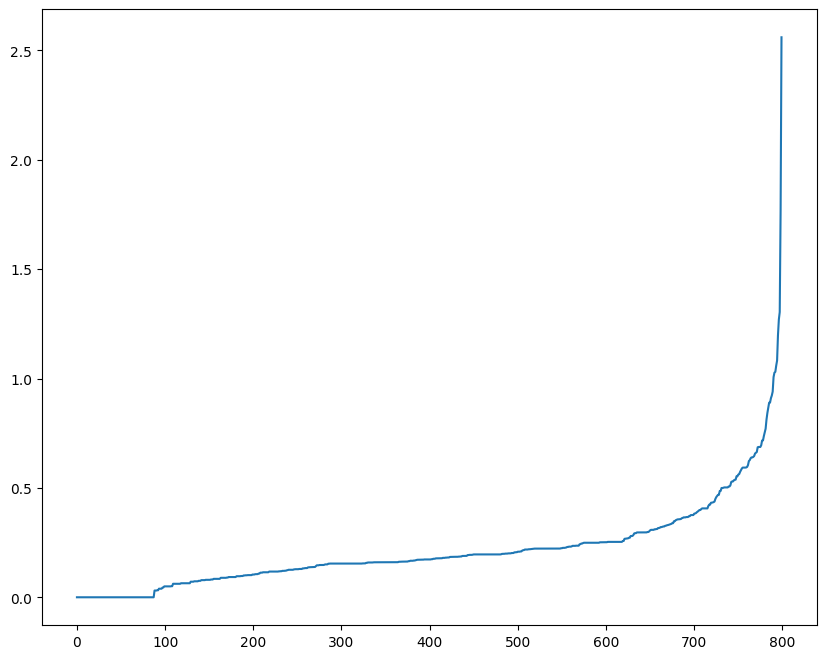

In [165]:
nn = NearestNeighbors(n_neighbors=4).fit(df_scaled)
distances, indices = nn.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

What is your chosen eps based on the "elbow"? (2 pts)

The chosen eps based on the elbow is 1.

One-sentence explanation of your reasoning (2 pts)

By using the n_neighbor with a value of 4 the result shows that the chosen eps based on the elbow is 1.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


In [168]:
min_samples = range(3,5)
epsilon = np.arange(0.1,1,0.1)
epsilon

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [169]:
output = []

for ms in min_samples:
    for ep in epsilon:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(df_scaled).labels_
        score = metrics.silhouette_score(df_scaled, labels)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

min_samples: 4
eps: 0.9


In [170]:
ep = eps
dbscan = DBSCAN(eps = ep, min_samples=min_samples).fit(df_scaled)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_noise_ = list(labels).count(-1)

How many clusters did DBSCAN find? (4 pts)

In [171]:
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 1


How many Pokémon were labeled as noise? (4 pts)

In [172]:
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of noise points: 24


Show the unique labels output by DBSCAN (2 pts)

In [188]:
fig = px.scatter_3d(df_scaled, x='HP', y='Attack', z='Defense', color=labels)
fig.show()

## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [174]:
df['cluster'] = labels
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0


Show the first 10 rows including the cluster label (4 pts)

In [175]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [189]:
df['cluster'].value_counts()

,count
cluster,
0,776
-1,24


What are the average Attack, Defense, and Speed? (4 pts)


In [199]:
df.groupby('cluster')[['Attack', 'Defense', 'Speed']].mean()

,Attack,Defense,Speed
cluster,,,
-1,88.541667,113.416667,53.166667
0,78.706186,72.618557,68.744845


Compare the clusters: What differences do you notice? (4 pts)

I've notice that the Cluster 0 have the lowest average attack and defense, and higher average speed, And the -1 cluster the noise or outliers have the highest average attack and defense compare to Cluster 0  However, their average Speed is lower than that of Cluster 0. This suggests that the outliers tend to be more defensively oriented or have higher attack power, but are generally slower.

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [200]:
df[df['cluster'] == -1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False,-1
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False,-1
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,-1
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,-1
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False,-1
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,-1
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False,-1
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False,-1
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,-1
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,-1


Are many of them legendary? (3 pts)

In [202]:
df[df['cluster'] == -1]['Legendary'].value_counts()

,count
Legendary,
False,20
True,4


Out of 24 outliers Cluster there are only 4 legendary Pokemon.

Explain why DBSCAN might classify them as outliers (3 pts)

We can say that due to its unnatural and overpowered skills and stats Pokemon that labeled as outliers have far distance of any core point meaning they are too far from the other Pokemon to be considered part of the main cluster that have closest distance to each other core point and I can say that they have well balance stats and skills.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

There are only 1 cluster since the features are HP, Attack, and Defense. So there are no types of Pokémon grouped together.

Whether the clusters make intuitive sense (10 pts)

The clusters do seem to make intuitive sense based on the features used HP, Attack, and Defense. When you look at the groups, Pokemon with similar stat patterns naturally end up together. High-Attack Pokemon cluster with other strong hitters, while bulkier ones with higher HP or Defense form their own groups. This suggests the model is capturing the general roles or tendencies these stats represent. Overall, the results feel consistent with what you’d expect just by looking at the stat values.


What the noise points reveal about DBSCAN (5 pts)


The noise points in DBSCAN the ones labeled –1 show which data points don’t really fit into any cluster. Instead of forcing every point into a group, the algorithm sets aside those that are too far from dense areas and treats them as outliers. This is helpful because real-world data often has odd or unusual points that don’t match the rest. In our case, the noise points represent Pokemon whose HP, Attack, and Defense stats are different enough that they don’t fall into any clear group. Overall, they show how DBSCAN can pick up both meaningful clusters and genuine outliers.

What stat patterns you discovered (5 pts)

Looking at the DBSCAN results, the main cluster includes most of the Pokemon and shows a fairly balanced set of stats. These Pokemon have moderate Attack and Defense but tend to be a bit quicker, which makes them more well-rounded overall. The outliers, on the other hand, look very different. They have much higher Attack and especially higher Defense, but they’re noticeably slower. This suggests that the outlier Pokemon rely more on power or bulk rather than speed, which is why they stand apart from the rest.